# Neural Network in NumPy

In [32]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from model import Net, RMSProp
from dataset import MNIST, DataLoader
from module import Module, Optimizer

In [142]:
def train(model: Module, optimizer: Optimizer, trainloader: DataLoader, testloader: DataLoader, epochs: int):

    losses = []
    accs = []
    for epoch in tqdm(range(epochs), desc=f"Epoch"):
        
        for i, (img, labels) in enumerate(trainloader):
            avg_loss = 0
            optimizer.step()
            output = model(img)
            loss = model.loss(output, labels)
            grad = model.loss.backward(1)
            model.backward(grad)
            avg_loss += loss
        
        losses.append(avg_loss / len(trainloader))
        acc = test(model, testloader)
        accs.append(acc)
        print(f"Epoch: {epoch}, Loss: {(avg_loss / len(trainloader)):.6f}, Accuracy: {acc:.4f}")
    return losses, accs

def test(model: Module, testloader: DataLoader):
    correct = 0
    total = 0
    for i, (img, labels) in enumerate(testloader):
        output = model(img)
        correct += np.sum(np.argmax(output, axis=1) == labels)
        total += len(labels)
    return correct / total

In [143]:
train_set = MNIST(train=True)
test_set = MNIST(train=False)
train_loader = DataLoader(train_set, batch_size=32)
test_loader = DataLoader(test_set, batch_size=32)

model = Net()
optimizer = RMSprop(model.params, lr=0.001)
losses, accs = train(model, optimizer, train_loader, train_loader, epochs=10)

Epoch:  10%|█         | 1/10 [00:03<00:35,  3.96s/it]

Epoch: 0, Loss: 0.002692, Accuracy: 0.8674


Epoch:  20%|██        | 2/10 [00:07<00:30,  3.82s/it]

Epoch: 1, Loss: 0.000581, Accuracy: 0.9026


Epoch:  30%|███       | 3/10 [00:11<00:26,  3.74s/it]

Epoch: 2, Loss: 0.000218, Accuracy: 0.9223


Epoch:  40%|████      | 4/10 [00:14<00:22,  3.67s/it]

Epoch: 3, Loss: 0.000001, Accuracy: 0.9328


Epoch:  50%|█████     | 5/10 [00:18<00:18,  3.63s/it]

Epoch: 4, Loss: 0.000002, Accuracy: 0.9399


Epoch:  60%|██████    | 6/10 [00:21<00:14,  3.59s/it]

Epoch: 5, Loss: 0.000001, Accuracy: 0.9467


Epoch:  70%|███████   | 7/10 [00:25<00:10,  3.61s/it]

Epoch: 6, Loss: 0.000001, Accuracy: 0.9511


Epoch:  80%|████████  | 8/10 [00:29<00:07,  3.54s/it]

Epoch: 7, Loss: 0.000001, Accuracy: 0.9544


Epoch:  90%|█████████ | 9/10 [00:32<00:03,  3.46s/it]

Epoch: 8, Loss: 0.000000, Accuracy: 0.9579


Epoch: 100%|██████████| 10/10 [00:35<00:00,  3.58s/it]

Epoch: 9, Loss: 0.000000, Accuracy: 0.9606


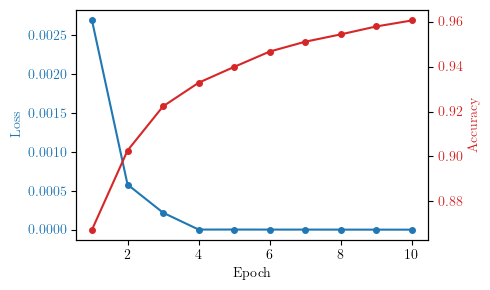

In [153]:
# Set up Latex font for plots
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot loss on left y-axis and accuracy on right y-axis
epochs = np.arange(1, len(losses) + 1)
fig, ax1 = plt.subplots(figsize=(5,3))
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:blue')
ax1.plot(epochs, losses, color='tab:blue', marker='o', markersize=4)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:red')
ax2.plot(epochs, accs, color='tab:red', marker='o', markersize=4)
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.savefig('mnist_loss_acc.png', bbox_inches='tight', dpi=450)
plt.show()

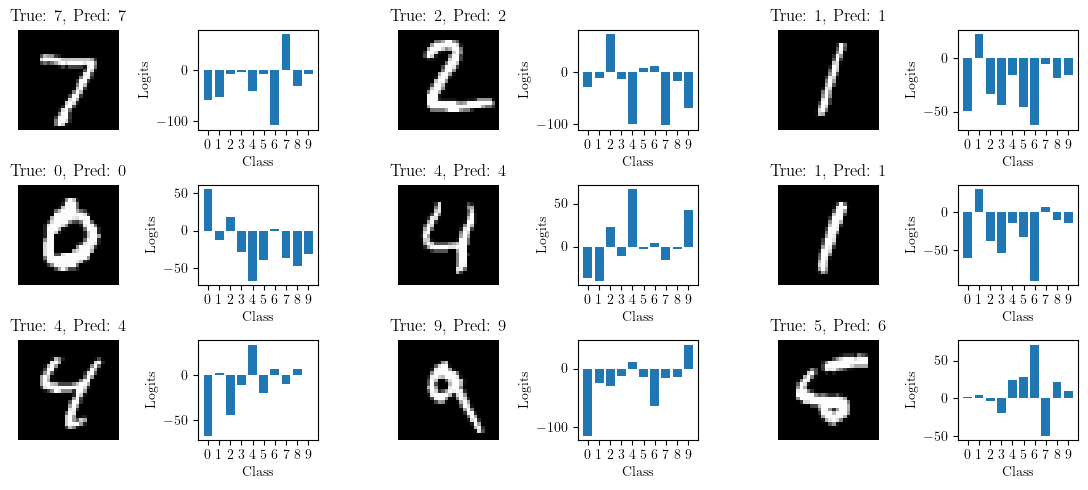

In [165]:
# Plot some predictions along with the model's output logits
fig, axs = plt.subplots(3, 6, figsize=(11,5))
for i, ax in enumerate(axs.flatten()):
    img, label = test_set[i // 2]
    output = model(img[np.newaxis, :])
    if i % 2 == 0:
        ax.imshow(img.reshape(28, 28), cmap='gray')
        ax.axis('off')
        ax.set_title(f"True: {label}, Pred: {np.argmax(output)}")
    else:
        ax.bar(np.arange(10), output.squeeze())
        ax.set_xticks(np.arange(10))
        ax.set_ylabel('Logits')
        ax.set_xlabel('Class')

fig.tight_layout()
plt.savefig('mnist_predictions.png', bbox_inches='tight', dpi=450)
plt.show()